#  2.0 EDA - Analisis Univariado

## Import libraries

In [99]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.utils.paths import references_dir
from src.visualization.word_cloud import words_cloud_maskable_image
from src.visualization.analysis_univariate import univariate_analysis
from src.visualization.analysis_univariate import count_plot_percentage

## Set up

In [102]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

In [103]:
# Definimos el constantes de colores de acuerdo al negocio para usar en los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR_VINO_BLANCO = "#ffffbf"

## Read Data

In [104]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINE_CSV_PATH = data_dir("processed", "df_wine_enriched.csv")

WINE_CSV_PATH

WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/processed/df_wine_enriched.csv')

In [105]:
# Leemos los csv's y los guardamos en un dataframe
df_wine = pd.read_csv(WINE_CSV_PATH)

# Analisis Univariado

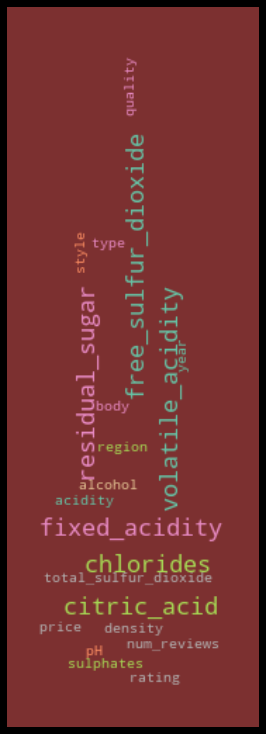

In [106]:
words_cloud_maskable_image(list(df_wine.columns), references_dir("img_bottles.png"))

In [107]:
shape_df =df_wine.shape
print(f"Tenemos un dataframe de {shape_df[0]} filas y {shape_df[1]} columnas")

Tenemos un dataframe de 6067 filas y 21 columnas


In [108]:
# Corregimos los tipos de datos
df_wine["quality"] = df_wine["quality"].astype("category").cat.as_ordered()
df_wine["type"] = df_wine["type"].astype("category")
df_wine["style"] = df_wine["style"].astype("category")
df_wine["body"] = df_wine["body"].apply(lambda x: f'{x:.0f}').astype("category")
df_wine["rating"] = df_wine["rating"].astype("category").cat.codes.astype("category").cat.as_ordered()

In [109]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6067 entries, 0 to 6066
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6067 non-null   float64 
 1   volatile_acidity      6067 non-null   float64 
 2   citric_acid           6067 non-null   float64 
 3   residual_sugar        6067 non-null   float64 
 4   chlorides             6067 non-null   float64 
 5   free_sulfur_dioxide   6067 non-null   float64 
 6   total_sulfur_dioxide  6067 non-null   float64 
 7   density               6067 non-null   float64 
 8   pH                    6067 non-null   float64 
 9   sulphates             6067 non-null   float64 
 10  alcohol               6067 non-null   float64 
 11  quality               6067 non-null   category
 12  style                 6067 non-null   category
 13  year                  6067 non-null   int64   
 14  rating                6067 non-null   category
 15  num_

## Quality

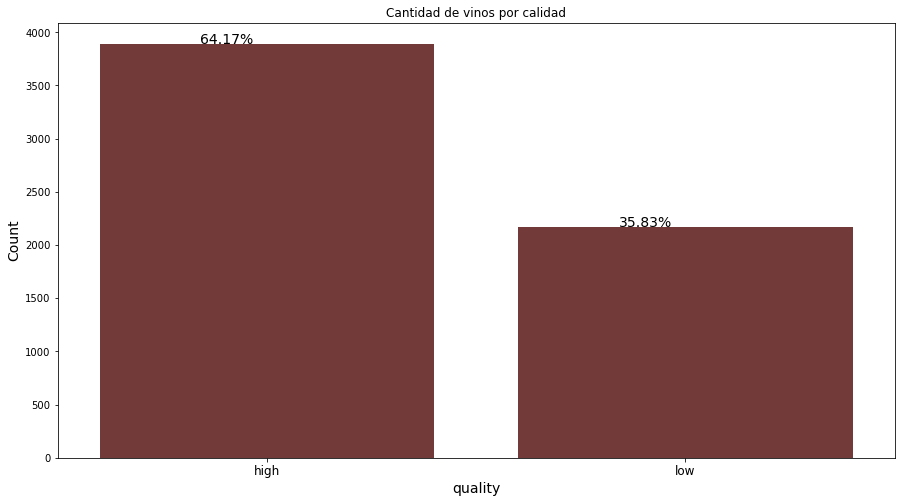

In [110]:
count_plot_percentage(df_wine, 'quality', 'Cantidad de vinos por calidad')

In [111]:
df_wine.quality.value_counts()

high    3893
low     2174
Name: quality, dtype: int64

- Es mayor la cantidad de vinos de alta calidad que de baja calidad
- El 64,17% de los vinos son marcados como de alta calidad , y el 35,83% de los vinos son marcados como de baja calidad.

## Price

### Descripcion de la columna price 

count    6067.000
mean       44.073
std        30.795
min         6.260
25%        19.980
50%        31.630
75%        61.940
max       124.880
Name: price, dtype: float64


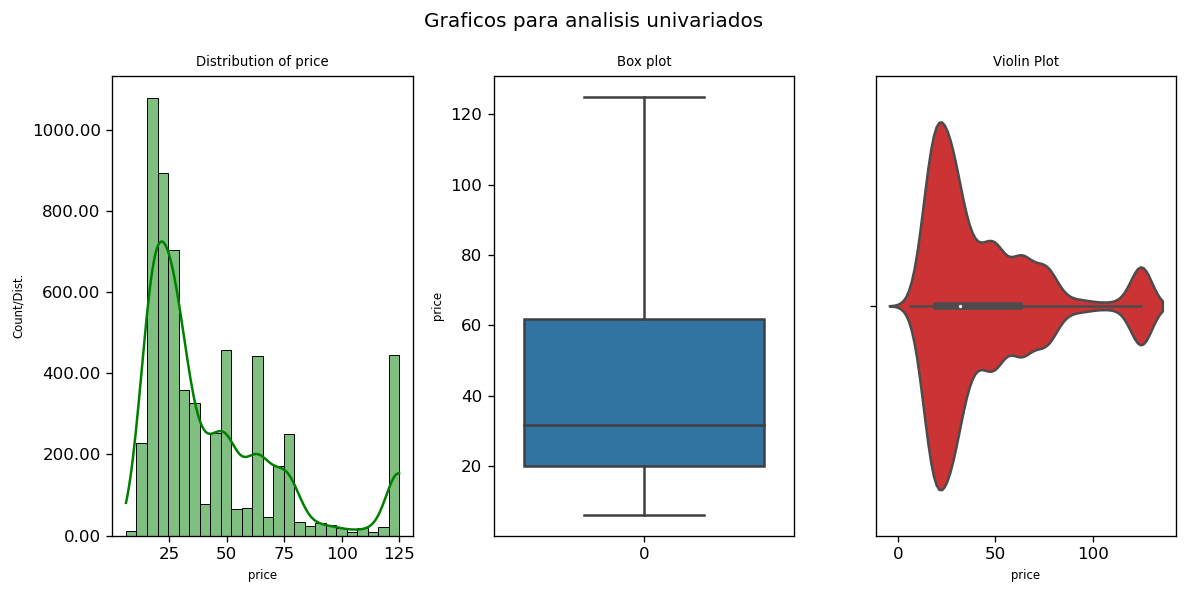

In [112]:
univariate_analysis(dataframe=df_wine, column_name='price')

- Los precios no estan distribuidos de forma normal
- Es menor la cantidad de vinos de alto precio que los de baja, lo que supone en principio que no hay una relacion directa entre la calidad y el precio
- El 64% de los vinos de alta calidad no se puede explicar directamente con el 25 % de los vinos acumulados en el ultimo rango iterquartil.

## Rating

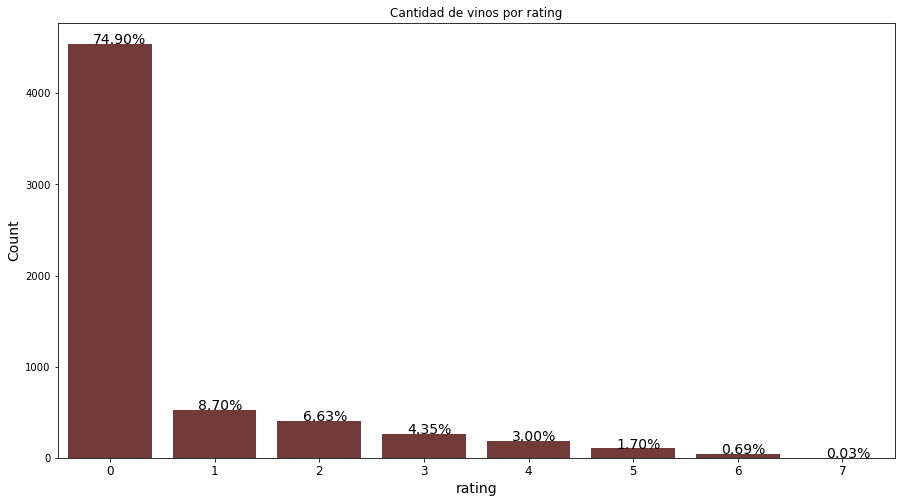

In [113]:
count_plot_percentage(df_wine, 'rating', 'Cantidad de vinos por rating')

- La mayoria de los rating sin bajos
- Que el 74% de los vinos tengan una calificacion de 0 puede indicar que la suposición que hicimos anteriormente de cambiar los valores de los rating no sea adecuada. Puede ser que solo estemos trabajando con vinos de puntuaciones de 4 en adelante y que la escala de calificaciones sea de 0 a 5, entonces sería considerados todos de alta puntuacion.

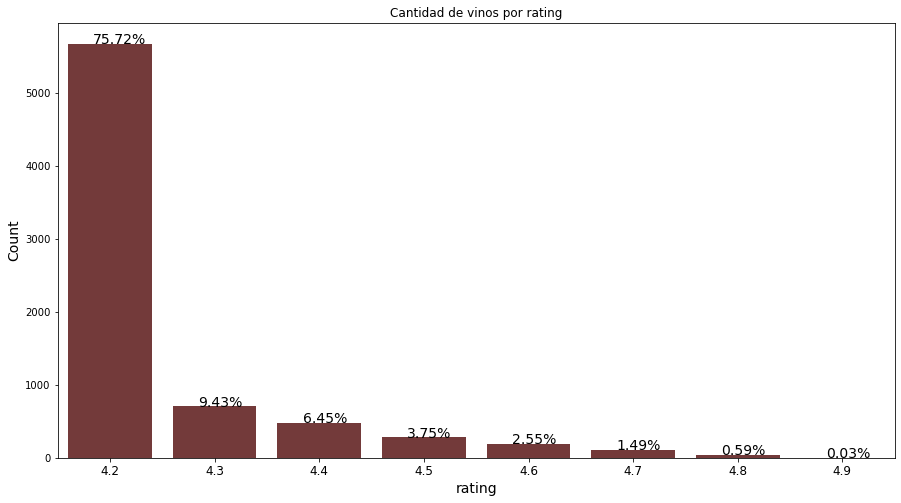

In [114]:
# Comparamos como estaban originalmente los datos
df_comercial = pd.read_csv(data_dir("raw", "wines_SPA.csv"))
count_plot_percentage(df_comercial, 'rating', 'Cantidad de vinos por rating')

In [115]:
# Corregimos la columna rating, porque 0 no es lo mismo que 4.2
df_wine['rating'] = df_wine['rating'].map({0: '4.2', 1: '4.3', 2: '4.4', 3: '4.5', 4: '4.6', 5: 4.7, 6: '4.8', 7: '4.9'})

In [116]:
df_wine['rating'].value_counts()

4.2    4544
4.3     528
4.4     402
4.5     264
4.6     182
4.7     103
4.8      42
4.9       2
Name: rating, dtype: int64

## Alcohol

### Descripcion de la columna alcohol 

count    6067.000
mean       10.495
std         1.192
min         8.000
25%         9.500
50%        10.300
75%        11.300
max        14.000
Name: alcohol, dtype: float64


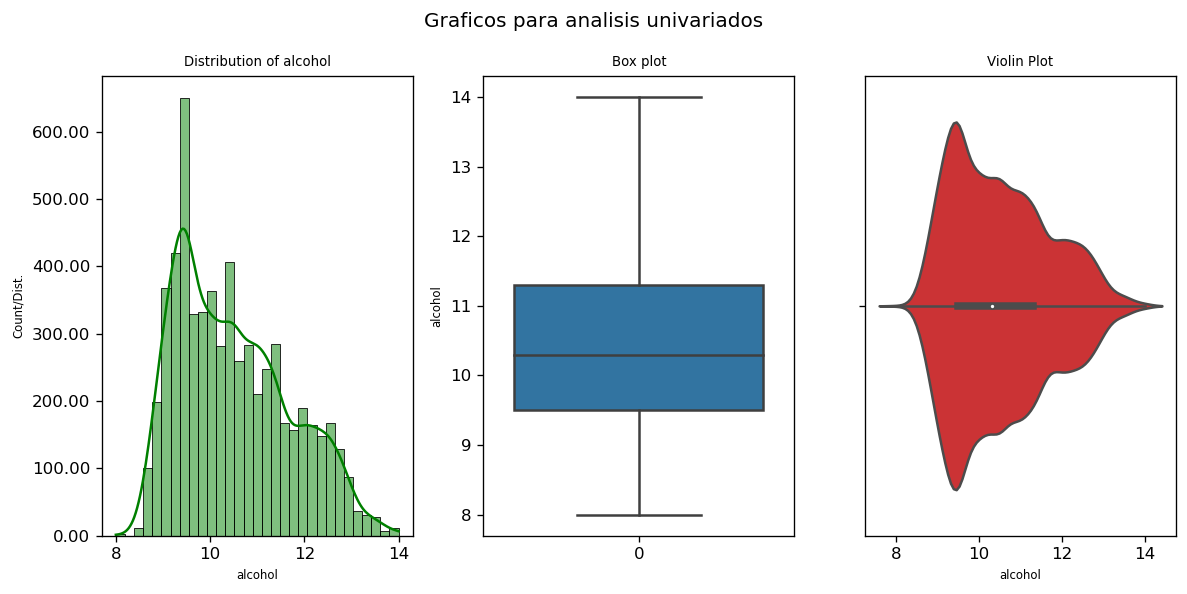

In [117]:
univariate_analysis(dataframe=df_wine, column_name='alcohol')

-  La distribucion está un poco mejor distribuida que la de precios
-  Hay una leve tendencia a la concentración de vinos en baja concentracion de alcohol
-  Puede haber una relacion ligeramente inversa entre la concentracion de alcohol y la alta calidad de los vinos

## Style

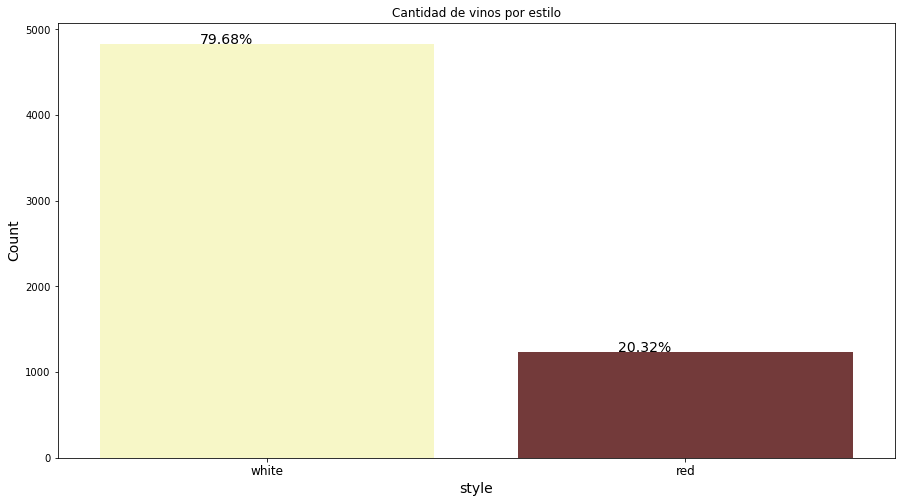

In [119]:
count_plot_percentage(df_wine, 'style', 'Cantidad de vinos por estilo',[COLOR_VINO_BLANCO, COLOR_VINO_TINTO])

- El 79.68% de los vinos son de tipo blancos y el resto tintos

## Year

### Descripcion de la columna year 

count    6067.000
mean     2013.510
std         4.357
min      2002.000
25%      2011.000
50%      2015.000
75%      2017.000
max      2021.000
Name: year, dtype: float64


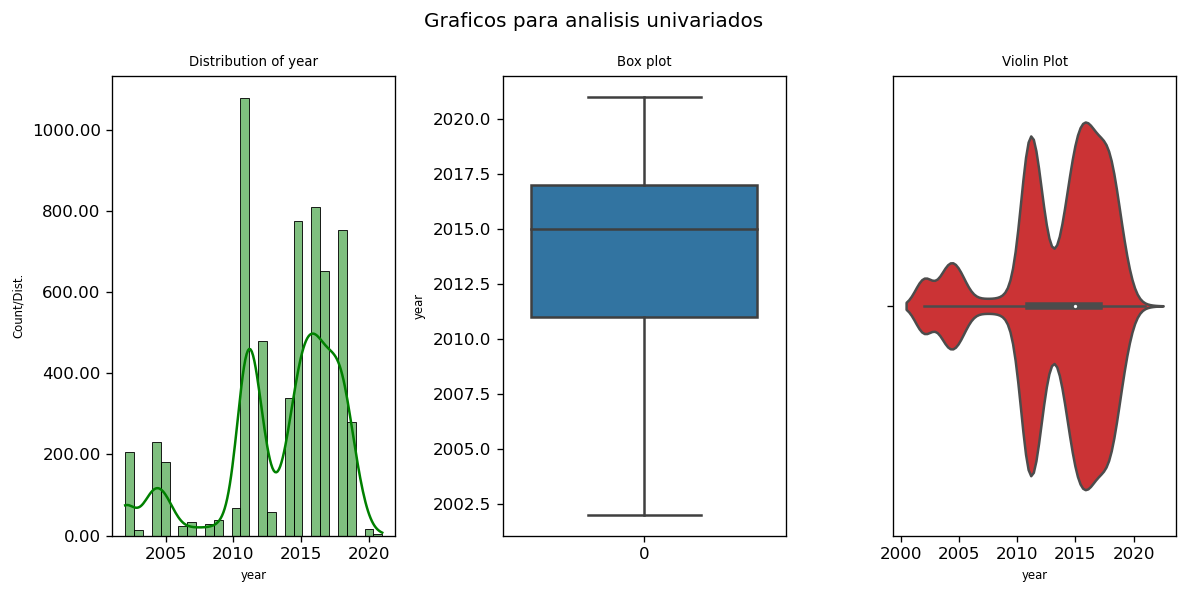

In [121]:
univariate_analysis(dataframe=df_wine, column_name='year')

- La mayoría de los vinos fueron producidosa partir de los años 2010
- La produccion más alta de los vinos es de los años 2010 y 2011
- En los ultimos años la produccion bajo considerablemente

## num_reviews

### Descripcion de la columna num_reviews 

count    6067.000
mean      397.346
std        31.578
min       344.000
25%       388.000
50%       402.000
75%       417.000
max       460.000
Name: num_reviews, dtype: float64


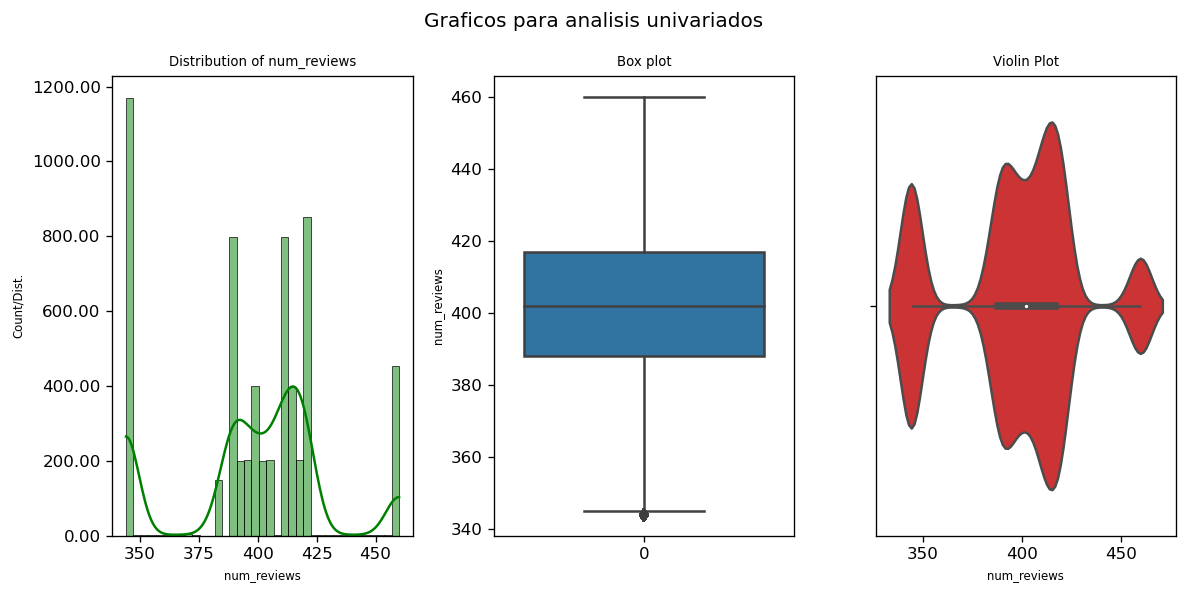

In [123]:
univariate_analysis(dataframe=df_wine, column_name='num_reviews')

## region

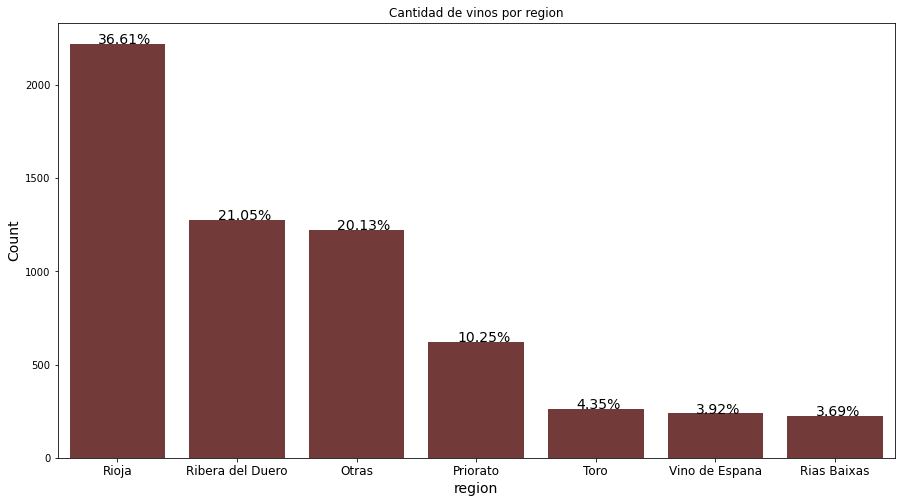

In [125]:
count_plot_percentage(df_wine, 'region', 'Cantidad de vinos por region')

- La mayoria de los vinos viene de la region 'Rioja'
- La mitad de los vinos proviene solo de dos regiones, 'Rioja' y 'Ribera del Duero'
- el 20,13 % de los vinos viene de otras regiones no especificadas

## Ph

### Descripcion de la columna pH 

count    6067.000
mean        3.214
std         0.153
min         2.795
25%         3.110
50%         3.200
75%         3.320
max         3.635
Name: pH, dtype: float64


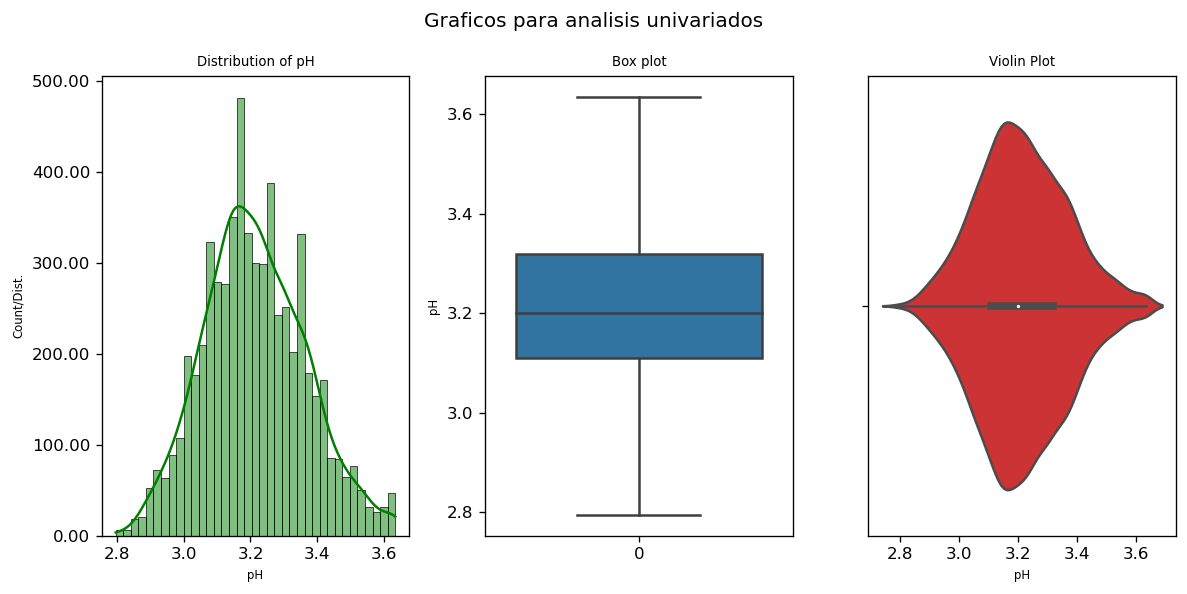

In [127]:
univariate_analysis(dataframe=df_wine, column_name='pH')

- La la varibale ph tiene una distribucion normal
- El centro de los datos se concentra alrededor de 3.2

## Chlorides

### Descripcion de la columna chlorides 

count    6067.000
mean        0.051
std         0.018
min         0.009
25%         0.037
50%         0.046
75%         0.059
max         0.092
Name: chlorides, dtype: float64


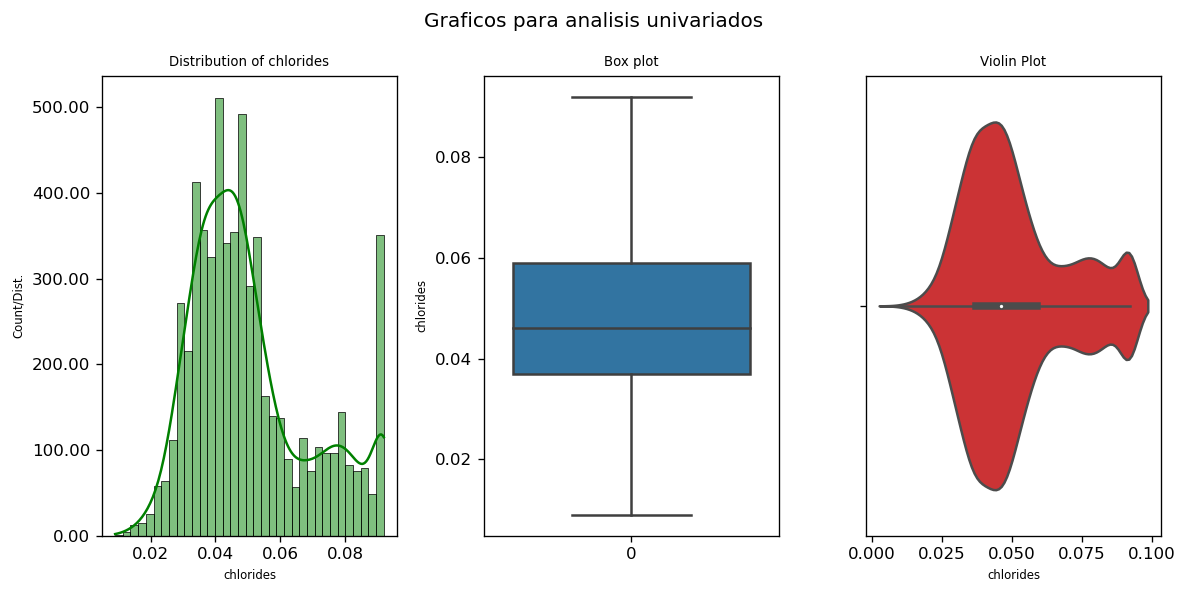

In [129]:
univariate_analysis(dataframe=df_wine, column_name='chlorides')

## Sulphates

### Descripcion de la columna sulphates 

count    6067.000
mean        0.517
std         0.123
min         0.220
25%         0.430
50%         0.500
75%         0.590
max         0.830
Name: sulphates, dtype: float64


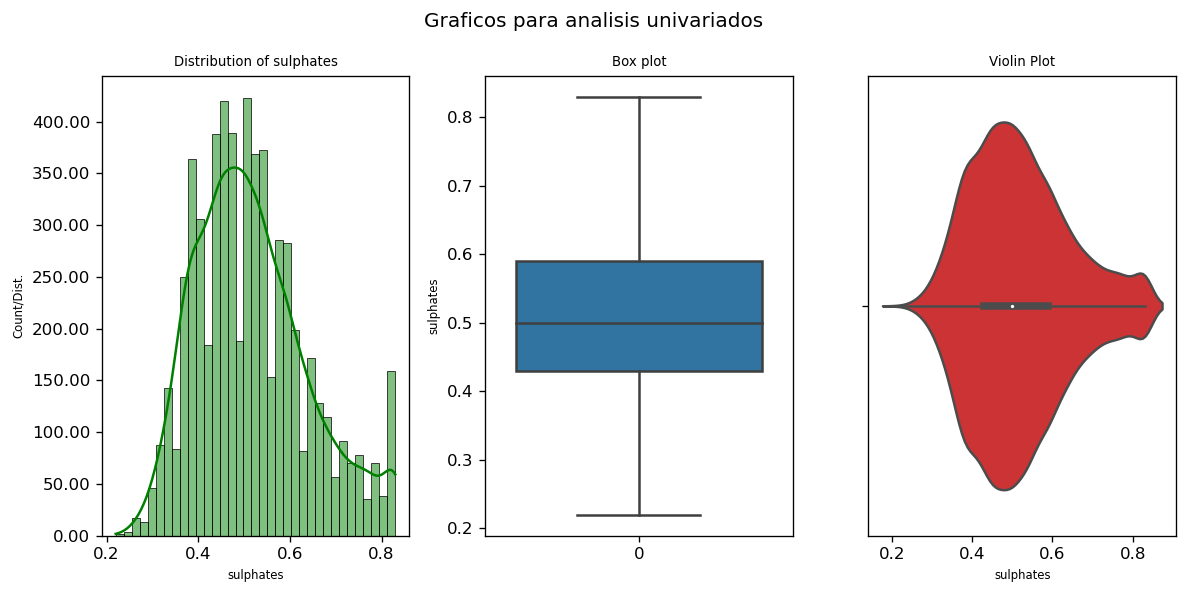

In [130]:
univariate_analysis(dataframe=df_wine, column_name='sulphates')

## type

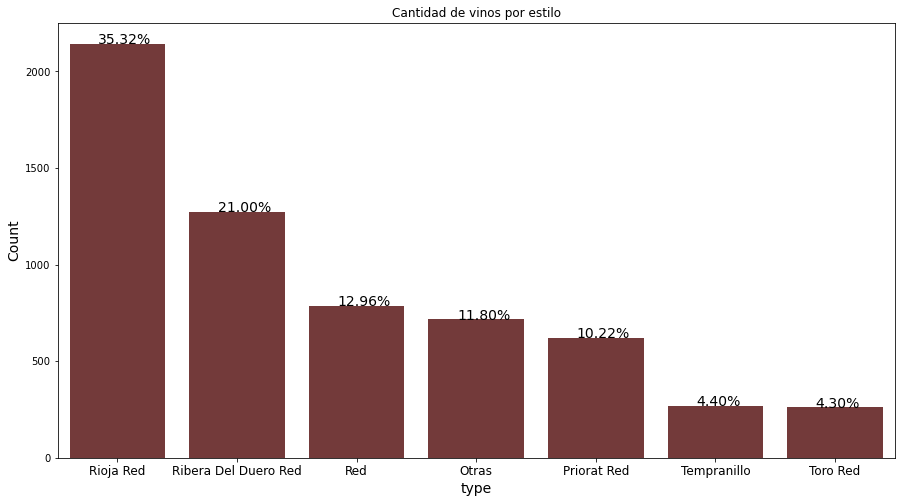

In [131]:
count_plot_percentage(df_wine, 'type', 'Cantidad de vinos por estilo')

- Los tipos de vinos 'Rioja Red' y 'Ribera del Duero Tinto' son los mas comunes y coinciden con los datos de las regiones 'Rioja' y 'Ribera del Duero'. 
- el 11.80% son de tipos no especificados

## acidity

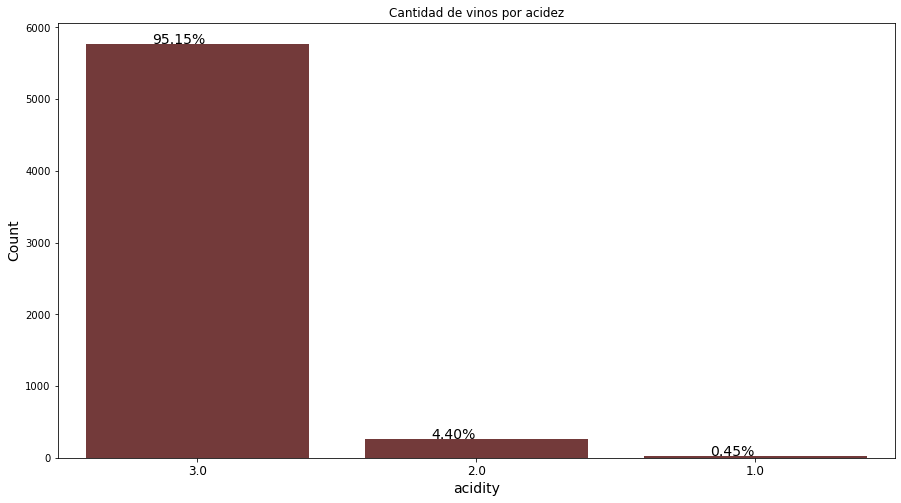

In [134]:
count_plot_percentage(df_wine, 'acidity', 'Cantidad de vinos por acidez',)

- Casi el total de lo vinos tiene una acidez de 3

## Body

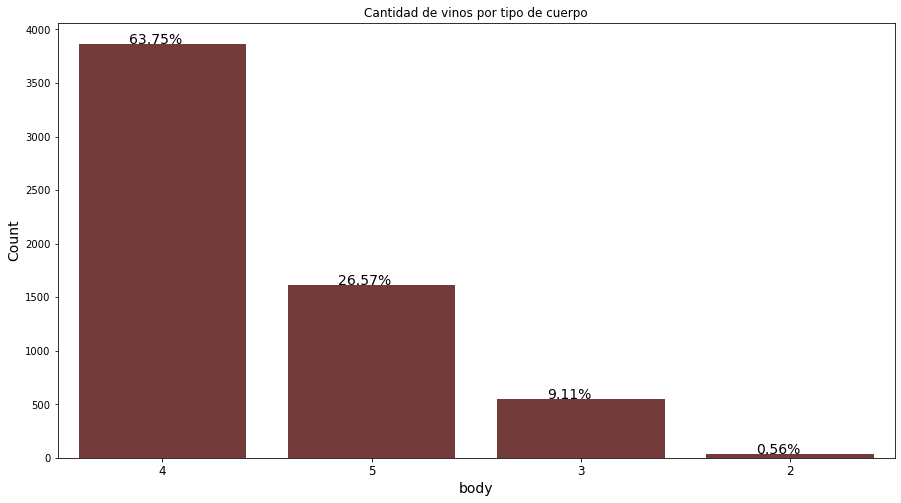

In [136]:
count_plot_percentage(df_wine, 'body', 'Cantidad de vinos por tipo de cuerpo')

## residual sugar

### Descripcion de la columna residual_sugar 

count    6067.000
mean        5.554
std         4.673
min         0.600
25%         1.800
50%         3.400
75%         8.300
max        18.050
Name: residual_sugar, dtype: float64


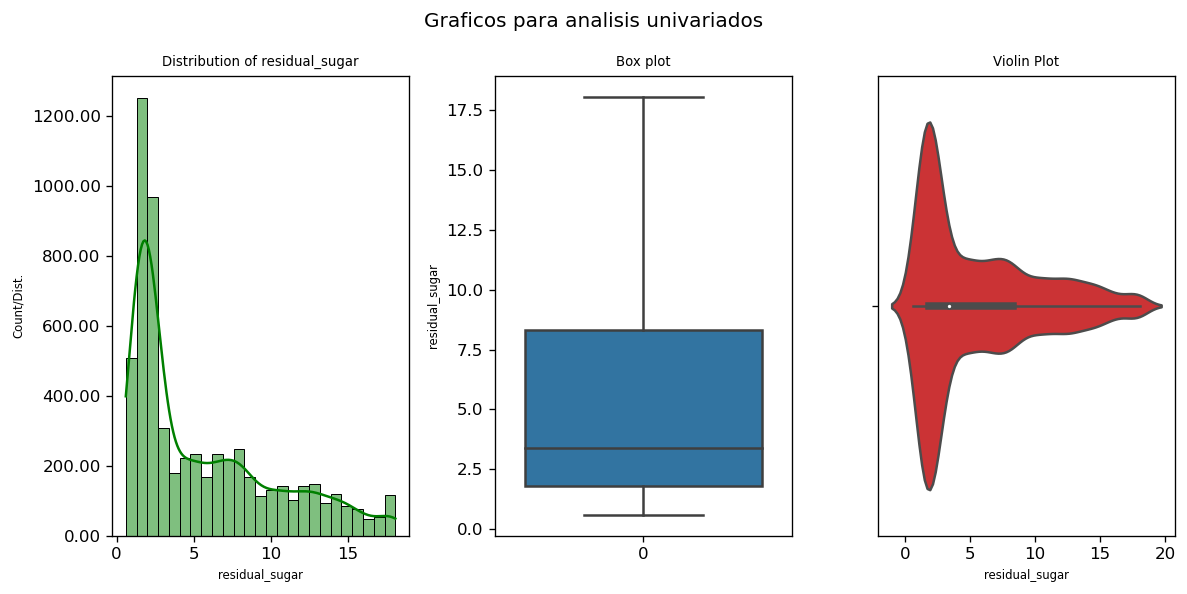

In [137]:
univariate_analysis(dataframe=df_wine, column_name='residual_sugar')

- La mayoria de los vinos tiene un azucar residual menor a 5

In [138]:
# guardamos el dataframe porque cambiamos los valores de rating
df_wine.to_csv(data_dir("processed", "df_wine_enriched_2.csv"), index=False)